# New Section

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
id = '1a_Is-eD8SE-I1o3Xw6vW2HHijqQia4SM'

In [ ]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
data1 = pd.read_csv('Filename.csv', encoding= 'latin')

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import keras
from warnings import filterwarnings
filterwarnings('ignore')
import os

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
data1.head()

,Number,Assignment group,Description,Short description,Created,Resolution notes,Priority,Assigned To,Category
0,INC0010711,Network L1,BVABANTWA03 - Node down was triggered for Ci...,BVABANTWA03 - Node down,2019-03-16 01:26:01,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
1,INC0010712,Network L1,BVABANTGRAS01 - Node down was triggered for ...,BVABANTGRAS01 - Node down,2019-03-16 01:27:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
2,INC0010256,Network L2,BVNCLGSWA01 - Node down was triggered for Ci...,BVNCLGSWA01 - Node down,2019-03-04 07:55:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network
3,INC0010363,ServiceNow Support,NaN,Test Incident,2019-03-06 12:28:37,testing,P4,NaN,ServiceNow
4,INC0010859,Network L2,Dell Monitor keeps blacking out all day every ...,Dell Monitor Intermittent Blackout,2019-03-21 10:06:43,Mistakenly created.,P3,NaN,Service Desk


In [ ]:
df1 = data1.copy()

In [ ]:
data1['Descript'] = data1['Short description']+' '+data1['Description']

In [ ]:
data1.head()

,Number,Assignment group,Description,Short description,Created,Resolution notes,Priority,Assigned To,Category,Descript
0,INC0010711,Network L1,BVABANTWA03 - Node down was triggered for Ci...,BVABANTWA03 - Node down,2019-03-16 01:26:01,Resolution notes copied from Parent Incident: ...,P2,NaN,Network,BVABANTWA03 - Node down BVABANTWA03 - Node...
1,INC0010712,Network L1,BVABANTGRAS01 - Node down was triggered for ...,BVABANTGRAS01 - Node down,2019-03-16 01:27:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network,BVABANTGRAS01 - Node down BVABANTGRAS01 - ...
2,INC0010256,Network L2,BVNCLGSWA01 - Node down was triggered for Ci...,BVNCLGSWA01 - Node down,2019-03-04 07:55:00,Resolution notes copied from Parent Incident: ...,P2,NaN,Network,BVNCLGSWA01 - Node down BVNCLGSWA01 - Node...
3,INC0010363,ServiceNow Support,NaN,Test Incident,2019-03-06 12:28:37,testing,P4,NaN,ServiceNow,NaN
4,INC0010859,Network L2,Dell Monitor keeps blacking out all day every ...,Dell Monitor Intermittent Blackout,2019-03-21 10:06:43,Mistakenly created.,P3,NaN,Service Desk,Dell Monitor Intermittent Blackout Dell Monito...


In [ ]:
df = data1[['Descript','Assignment group']]
df.head()

,Descript,Assignment group
0,BVABANTWA03 - Node down BVABANTWA03 - Node...,Network L1
1,BVABANTGRAS01 - Node down BVABANTGRAS01 - ...,Network L1
2,BVNCLGSWA01 - Node down BVNCLGSWA01 - Node...,Network L2
3,NaN,ServiceNow Support
4,Dell Monitor Intermittent Blackout Dell Monito...,Network L2


In [ ]:
# Get the count of each value
value_counts = df['Assignment group'].value_counts()

In [ ]:
# Select the values where the count is less than 250 (or 5 if you like)
to_others = value_counts[value_counts <= 2000].index

In [ ]:
df.loc[df['Assignment group'].isin(to_others), 'Assignment group'] = 'Others'

In [ ]:
df.loc[df['Assignment group']=='GPS \x96 Business Improvement Hybrid Team', 'Assignment group'] = 'GPS Business Improvement Hybrid Team'

In [ ]:
# Because the computation is time consuming (in terms of CPU), the data was sampled
# trying various different sample sizes - 10k , 50k or 100k 

#df2 = df.sample(10000, random_state=1).copy()

df2 = df.sample(20000, random_state=1).copy()

#df2 = df.sample(50000, random_state=1).copy()

#df2 = df.sample(100000, random_state=1).copy()

#df2 = df.copy()

In [ ]:
df2.dropna(axis=0, how='any', inplace=True)

In [ ]:
df2 = df2[['Assignment group','Descript']]

In [ ]:
df2.rename(columns = {'Assignment group':'Product', 'Descript':'Consumer_complaint'}, inplace = True)

In [ ]:
# Create a new column 'category_id' with encoded categories
# Encoding Category variable with Factorize function 
 
df2['category_id'] = df2['Product'].factorize()[0]


# Category and their code
category_id_df = df2[['Product', 'category_id']].drop_duplicates()


# Dictionaries for future use
# Dict 1 - for Category to ID -- > Feeding .values (Series data) to the Dictionary
category_to_id = dict(category_id_df.values)

# Dict 1 - for ID to Category 
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
df2.head()

,Product,Consumer_complaint,category_id
75495,Server L1,CH3E-PWVDPM-05 - Alert - DPM: Online recover...,0
15380,Monitor IIMSS,KACI-PLVBIC-01 - BV_Linux_CPU_Utilization_Cr...,1
11122,Monitor IIMSS,BNGK-PSVORA-01 - BV_Linux_CPU_Utilization_Cr...,1
23231,Monitor IIMSS,AGGR01_SATA - BV_Storage_Pool_Free_Space_Uti...,1
128102,L1 English,ProjectWise - trouble logging in The professio...,2


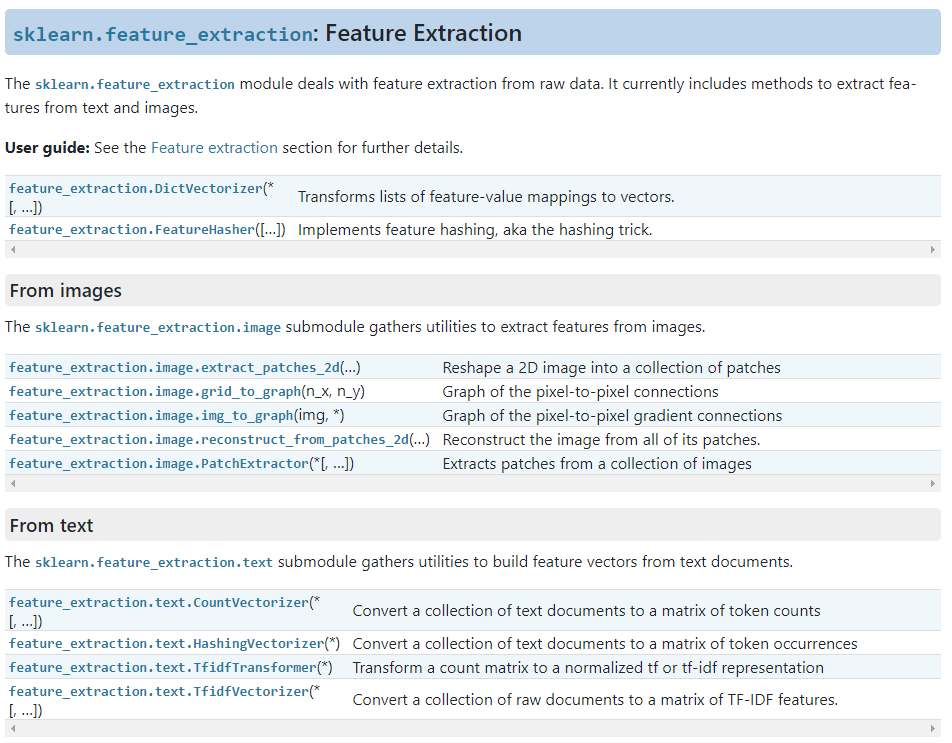

https://scikit-learn.org/stable/modules/classes.html#text-feature-extraction-ref

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer

# Tf- idf  : 

https://towardsdatascience.com/tf-idf-explained-and-python-sklearn-implementation-b020c5e83275


# ngram_rangetuple (min_n, max_n), default=(1, 1)
The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used. For example an ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams. Only applies if analyzer is not callable.

# sublinear_tfbool, default=False
Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf).

# max_dffloat or int, default=1.0
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float in range [0.0, 1.0], the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

# min_dffloat or int, default=1
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float in range of [0.0, 1.0], the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 19010 complaints is represented by 18434 features (TF-IDF score of unigrams and bigrams)


In [ ]:
X = df2['Consumer_complaint'] # Collection of documents
y = df2['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)



In [ ]:
# Just for testing
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
cv_df

""
0
1
2
3
4
5
6
7
8
9


In [ ]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

# With 10k Smaples

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.773867,0.008822
LogisticRegression,0.744879,0.002425
MultinomialNB,0.654763,0.002456
RandomForestClassifier,0.533978,0.004933


# With 20k Smaples

In [ ]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.794950,0.003764
LogisticRegression,0.772593,0.006145
MultinomialNB,0.666702,0.004662
RandomForestClassifier,0.526670,0.005491
